# Homework 1

In [19]:
import numpy as np
import matplotlib.pyplot as plt

1. Compute the Gradient of L explicitly.

In [20]:
# One-dimensional function
theta_0 = 1.0

def l(theta):
    return (theta -3)**2 + 1

def grad_l(theta):
    return 2*(theta -3)

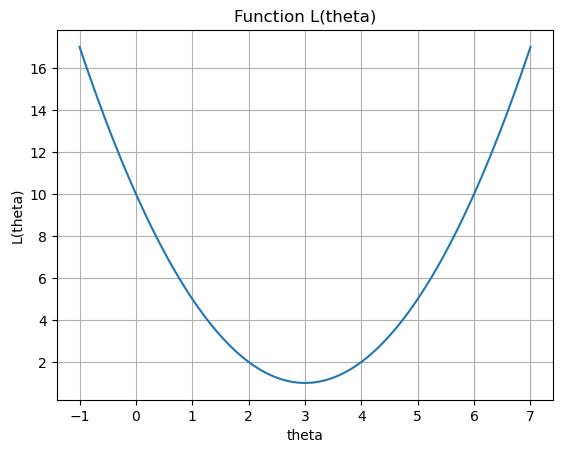

In [21]:
# Draw L(theta)
theta_vals = np.linspace(-1, 7, 100)
L_vals = l(theta_vals)
plt.plot(theta_vals, L_vals)
plt.xlabel('theta')
plt.ylabel('L(theta)')
plt.title('Function L(theta)')
plt.grid()
plt.show()

2. Implement the Gradient Descent to optimize 
 following what we introduced on the theoretical sections.

In [22]:
def GD(l, grad_l, theta_0, maxit, eta, tolL, tolTheta):
    loss_history = []
    theta_history = []

    # GD step
    for k in range(maxit):
        theta = theta_0 - eta * grad_l(theta_0)

        # viene fatta la norma per poter avere una misura scalare del vettore (o se theta fosse una matrice della matrice)
        # linalg.norm di base fa la norma 2 per i vettori e la norma di Frobenius per le matrici
        # controlliamo che la lunghezza del gradiente non sia troppo corta 
        # e che la differenza tra i parametri attuali e quelli precedenti non sia troppo piccola
        if(np.linalg.norm(grad_l(theta))<tolL or (np.linalg.norm(theta-theta_0)<tolTheta)):
            break

        loss_history.append(l(theta))
        theta_history.append(theta_0)

        theta_0 = theta
    return theta, k, loss_history, theta_history

In [23]:
maxit = 100
tolL = 1e-6
tolTheta = 1e-6
eta = 0.1

theta_opt, num_iter, _, _ = GD(l, grad_l, theta_0, maxit, eta, tolL, tolTheta)
print("Optimal theta:", theta_opt, " iterations:" , num_iter)
print("Optimal value of L:", l(theta_opt), " value of L at theta0:", l(theta_0))

Optimal theta: 2.9999961687611476  iterations: 58
Optimal value of L: 1.0000000000146785  value of L at theta0: 5.0


3-4. Test three different constant step sizes

In [24]:
etas = np.array([0.01, 0.2, 1.0])
loss_histories = []
theta_histories = []

for eta in etas:
    theta_opt, num_iter, loss_history, theta_history = GD(l, grad_l, theta_0, maxit, eta, tolL, tolTheta)
    loss_histories.append(loss_history)
    theta_histories.append(theta_history)
    print(f"Eta: {eta} => Optimal theta: {theta_opt}, iterations: {num_iter}, L(theta_opt): {l(theta_opt)}")


Eta: 0.01 => Optimal theta: 2.7347608882104932, iterations: 99, L(theta_opt): 1.0703517864228864
Eta: 0.2 => Optimal theta: 2.9999987718115575, iterations: 27, L(theta_opt): 1.0000000000015083
Eta: 1.0 => Optimal theta: 1.0, iterations: 99, L(theta_opt): 5.0


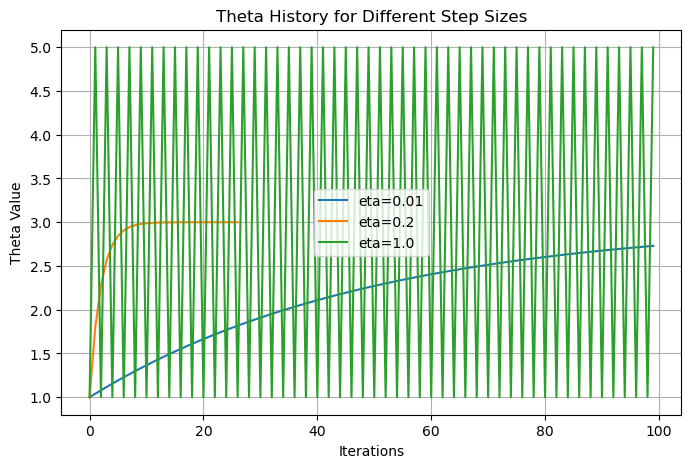

In [25]:
# Plotting theta histories for different etas on the same graph with the x axis as iterations
plt.figure(figsize=(8, 5))
for i, eta in enumerate(etas):
    plt.plot(theta_histories[i], label=f'eta={eta}')
plt.xlabel('Iterations')
plt.ylabel('Theta Value')
plt.title('Theta History for Different Step Sizes')
plt.legend()
plt.grid()
plt.show()

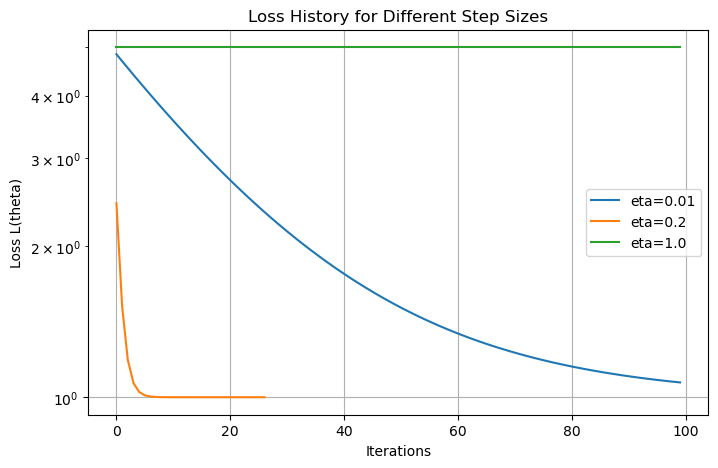

In [26]:
# Plotting the loss histories for different etas on the same graph with the x axis as iterations
plt.figure(figsize=(8, 5))
for i, eta in enumerate(etas):
    plt.plot(loss_histories[i], label=f'eta={eta}')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss L(theta)')
plt.title('Loss History for Different Step Sizes')
plt.legend()
plt.grid()
plt.show()

Relate your observations to the discussion in class about:

-step-size being too small / too large,
-the role of convexity,
-how the “just right” step size leads to fast convergence.

# Exercise 2: Backtracking Line Search

In [27]:
def l(theta):
    return theta**4 + 3*(theta**2) + 2

def grad_l(theta):
    return 4*(theta**3) + 6*theta

Implement Gradient Descent with Backtracking, using the Armijo condition, considering the backtracking(...) function from class.

In [28]:
def backtracking(L, grad_L, theta, eta0=1.0, beta=0.5, c=1e-4):
    """
    Return a step size eta that satisfies the Armijo condition:
        L(theta - eta*g) <= L(theta) - c * eta * ||g||^2
    """
    eta = eta0
    g = grad_L(theta)
    g_norm2 = np.dot(g, g)

    # se:   Loss_k+1 > Loss_k - Armijo_constante * eta * norma_2_gradiente
    # allora riduci eta
    while L(theta - eta * g) > L(theta) - c * eta * g_norm2:
        eta *= beta
    return eta

In [29]:
def GD_backtracking(l, grad_l, theta_0, maxit, eta, tolL, tolTheta):
    loss_history = []
    theta_history = []

    # GD step
    for k in range(maxit):
        # compute step size via backtracking 
        eta = backtracking(l, grad_l, theta_0, eta0=eta)
        
        theta = theta_0 - eta * grad_l(theta_0)

        # viene fatta la norma per poter avere una misura scalare del vettore (o se theta fosse una matrice della matrice)
        # linalg.norm di base fa la norma 2 per i vettori e la norma di Frobenius per le matrici
        # controlliamo che la lunghezza del gradiente non sia troppo corta 
        # e che la differenza tra i parametri attuali e quelli precedenti non sia troppo piccola
        if(np.linalg.norm(grad_l(theta))<tolL or (np.linalg.norm(theta-theta_0)<tolTheta)):
            break

        loss_history.append(l(theta))
        theta_history.append(theta_0)

        theta_0 = theta
    return theta, k, loss_history, theta_history

2. Test different initial points theta=[-2 , 0.5, 2]

In [30]:
starting_thetas = [-2.0, 0.5, 2.0]

In [31]:
maxit = 100
tolL = 1e-6
tolTheta = 1e-6
eta = 0.5 # high initial step size because backtracking will reduce it as needed

loss_histories = []
theta_histories = []

for theta_0 in starting_thetas:
    theta_opt, num_iter, loss_history, theta_history = GD_backtracking(l, grad_l, theta_0, maxit, eta, tolL, tolTheta)
    loss_histories.append(loss_history)
    theta_histories.append(theta_history)
    print("Starting theta:", theta_0, " Optimal theta:", theta_opt, " iterations:" , num_iter)


Starting theta: -2.0  Optimal theta: 1.646331206943718e-06  iterations: 27
Starting theta: 0.5  Optimal theta: 2.6815081729777975e-07  iterations: 21
Starting theta: 2.0  Optimal theta: -1.646331206943718e-06  iterations: 27


3. For each starting point, plot:
    - the function curve L(theta) in 1D in the domain [-3, 3]
    - the trajectory of the iterates theta overlaid on the curve.

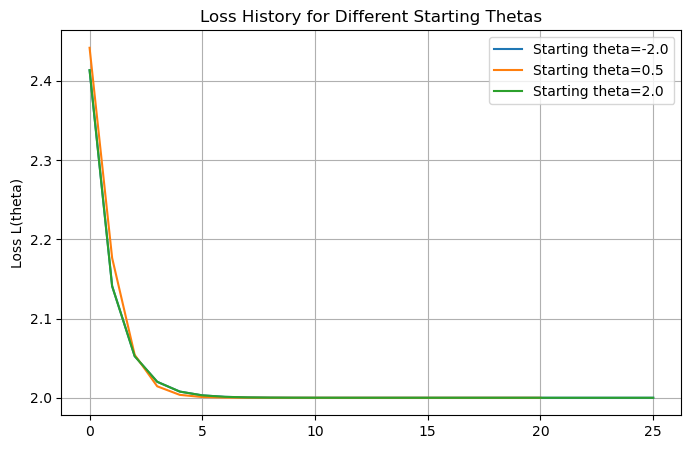

0 len: 27 min: 2.000000000020816 max: 4.00390625 contains NaN: False sample: [4.00390625, 2.4133367429021746, 2.140898102590965, 2.05251851368128, 2.020158641132446]
1 len: 21 min: 2.000000000000863 max: 2.441650390625 contains NaN: False sample: [2.441650390625, 2.1764684037916595, 2.054175551666509, 2.0144705994647287, 2.0036832689556503]
2 len: 27 min: 2.000000000020816 max: 4.00390625 contains NaN: False sample: [4.00390625, 2.4133367429021746, 2.140898102590965, 2.05251851368128, 2.020158641132446]


In [32]:
plt.figure(figsize=(8, 5))
for i, loss_history in enumerate(loss_histories):
    # array con solo i valori in [-3, 3]
    filter_loss_in_range = [loss for loss in loss_histories[i] if -3 <= loss <= 3]
    plt.plot(filter_loss_in_range, label=f'Starting theta={starting_thetas[i]}')
    plt.ylabel('Loss L(theta)')
    plt.title('Loss History for Different Starting Thetas')
    plt.legend()
    plt.grid()

plt.show()

# Starting theta 2 and -2 have the same loss history because of symmetry

for i, hist in enumerate(loss_histories):
    print(i, "len:", len(hist),
          "min:", np.nanmin(hist) if len(hist)>0 else None,
          "max:", np.nanmax(hist) if len(hist)>0 else None,
          "contains NaN:", np.isnan(hist).any() if len(hist)>0 else None,
          "sample:", hist[:5])

- Why different initializations converge to different minima.
- How backtracking automatically chooses a suitable step size at each iteration.
- Situations where constant step size would fail.

# Exercise 3: GD in 2D

In [45]:
A = np.array([[1.0, 0.0],
              [0.0, 25.0]])

def l(theta):
    return 1/2 * theta @ A @ theta.T 



How the gradient is computed:
$$    L(x)= \tfrac{1}{2}  x^{\top} A x        $$
$$x=\begin{pmatrix}x_1\\x_2\end{pmatrix},\qquad A=\begin{pmatrix}a_{11} & a_{12}\\a_{21} & a_{22}\end{pmatrix}$$
$$L(x)=\tfrac{1}{2}\left(a_{11}x_1^2 + (a_{12}+a_{21})x_1x_2 + a_{22}x_2^2\right).$$

Siccome A è una matrice Simmetrica:
$$a_{12} = a_{21} $$
$$L(x)=\tfrac{1}{2}\left(a_{11}x_1^2 + 2a_{12}x_1x_2 + a_{22}x_2^2\right).$$
$$L(x)=\tfrac{1}{2}a_{11}x_1^2 + a_{12}x_1x_2 + \tfrac{1}{2}a_{22}x_2^2.$$

Derivata parziale di x_1 
$$\frac{\partial L}{\partial x_1} = \tfrac{1}{2}2a_{11}x_1 + a_{12}x_2 + 0 $$
$$\frac{\partial L}{\partial x_1} = a_{11}x_1 + a_{12}x_2$$

Derivata parziale di x_2
$$\frac{\partial L}{\partial x_1} = 0 + a_{12}x_1 + \tfrac{1}{2}2a_{22}x_2  $$
$$\frac{\partial L}{\partial x_2} = a_{21}x_1 + a_{22}x_2$$

Inseriamo le derivate parziali come Righe:
$$ ∇L(x)= \begin{pmatrix} a_{11}x_1 & a_{12}x_2 \\a_{21}x_1 & a_{22}x_2\end{pmatrix} $$
$$ ∇L(x)= \begin{pmatrix} a_{11} & a_{12} \\a_{21} & a_{22}\end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}$$

In [49]:
def grad_l(theta):
    return A @ theta

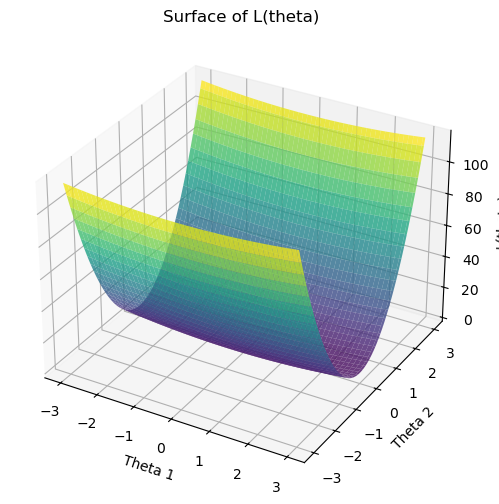

In [56]:
theta1_vals = np.linspace(-3, 3, 100)
theta2_vals = np.linspace(-3, 3, 100)
Theta1, Theta2 = np.meshgrid(theta1_vals, theta2_vals)
L_vals = 0.5 * (A[0,0]*Theta1**2 + A[1,1]*Theta2**2)

# Plot tree-dimensional surface of L(theta)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Theta1, Theta2, L_vals, cmap='viridis', alpha=0.8)
ax.set_xlabel('Theta 1')
ax.set_ylabel('Theta 2')
ax.set_zlabel('L(theta)')
ax.set_title('Surface of L(theta)')
plt.show()

In [ ]:
theta_0 = np.array([1.0, 1.0])

maxit = 100
tolL = 1e-6
tolTheta = 1e-6
etas = np.array([0.01, 0.1, 0.5])

loss_histories = []
theta_histories = []

for i, eta in enumerate(etas):
    theta_opt, num_iter, loss_history, theta_history = GD(l, grad_l, theta_0, maxit, eta, tolL, tolTheta)
    loss_histories.append(loss_history)
    theta_histories.append(theta_history)
    print(f"Eta: {eta} => Optimal theta: {theta_opt}, iterations: {num_iter}, L(theta_opt): {l(theta_opt)}")

Eta: 0.01 => Optimal theta: [3.66032341e-01 3.20720219e-13], iterations: 99, L(theta_opt): 0.066989837428981
Eta: 0.1 => Optimal theta: [2.65613989e-05 4.06561178e+17], iterations: 99, L(theta_opt): 2.0661498884852898e+36
Eta: 0.5 => Optimal theta: [7.88860905e-031 1.17431345e+106], iterations: 99, L(theta_opt): 1.7237651006195222e+213


In [72]:
# Helper function to plot level sets of quadratic function
def quad_levelsets(A, xlim=(-3,3), ylim=(-3,3), ngrid=400, 
                   ncontours=12, title=None):
    xs = np.linspace(xlim[0], xlim[1], ngrid)
    ys = np.linspace(ylim[0], ylim[1], ngrid)
    X, Y = np.meshgrid(xs, ys)
    Z = 0.5*(A[0,0]*X**2 + 2*A[0,1]*X*Y + A[1,1]*Y**2)  # theta^T A theta, left-multiplied convention
    cs = plt.contour(X, Y, Z, levels=ncontours)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.axhline(0, lw=0.5, color='k')
    plt.axvline(0, lw=0.5, color='k')
    plt.gca().set_aspect('equal', 'box')
    if title:
        plt.title(title)
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.grid(alpha=0.2)

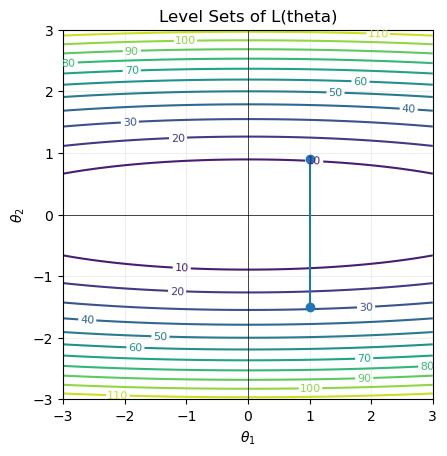

In [77]:
quad_levelsets(A, title='Level Sets of L(theta)')
theta_history = theta_histories[1] 
plt.plot(theta_history[0], theta_history[1], marker='o')
plt.show()